# Sorting Algorithms

__Sorting problem__ is a problem that takes the input of a sequence of numbers, which is denoted as $<a_1, a_2, a_3, ...., a_n>$, then provides the output which is a permutation of the input sequence $<a_1', a_2', a_3', ...., a_n'>$ such that $a_1 \le a_2 \le a_3 \le .... \le a_n$ (see <cite data-cite="Corm_Intr_2009">Cormen et al, 2009</cite>)

Based on the definition, we can see that sorting problems exists in many use-cases in both programming and real-life practice. Thus,  __sorting algorithms__ is important to solve these problems. However, there are many sorting algorithms, which leads to the essentials of choosing the right sorting algorithm for each use-case. Which algorithm is the fastest? Which algorithm should be used when the problem size is small (or very large)? Many questions need to be answered before making the choice.

To answer these questions, we will analyze the performance of the algorithms which are being considered. Despite the large number of sorting algorithms, this document will only focus on these four common sorting algorithms: __Insertion sort__, __Merge sort__, __Quick sort__ and __Heap sort__.

# What happens inside each sorting algorithm?

As its name stated, _Insertion sort_ algorithm sorts the data by inserting new item to the sorted data. The algorithm starts by considering the first item as the sorted part of the array. After that, the remaining items is inserted one-by-one into the  right position inside the sorted part so that the sorted part still remains sorted. That process is repeated until the whole array is sorted. Best case for this algorithm happens when the data is already sorted. While worst case happens when the data is in reversed order.

- Best case $O(n)$
- Average case $O(n^2)$
- Worst case $O(n^2)$


In _Merge sort_ algorithm, the array is splitted into smaller sub-arrays then the sub-arrays is merged back to create a sorted. To be specific, at first, the array is splitted into two smaller sub-arrays. This procedure is repeated untils the sub-arrays only have one item. These arrays can be considered as sorted. After that, they (the sub-arrays) are merged back to get the sorted sub-arrays. Then the sorted sub-arrays continue to be merge until the final array is sorted.

- Best case $O(n\lg n)$
- Average case $O(n\lg n)$
- Worst case $O(n\lg n)$


_Quick sort_ algorithm sorts the array by dividing the array into 2 sub-arrays with the left one contains items which are smaller than the pivot item and the right one contains items which are larger than the pivot item. Usually the last item of the array is chosen as the pivot item. That procedure is repeated inside each sub-array until no partitions can be made. Worst case happens when the array is sorted (both ascending and descending) or is identical. However, we can avoid the worst case by randomly choosing the pivot value.

- Best case $O(n\lg n)$
- Average case $O(n\lg n)$
- Worst case $O(n^2)$
 
 
_Heap sort_ algorithm involves in max heap. A max heap is a nearly complete binary tree and every node has the value that is larger than its children (if any). In heap sort, the array is first modified to create a max heap. Then, the root node, which is the largest (or smallest in min heap) item in the heap, is taken out as the last element in the sorted array. The max heap is recreated from the remaining items and that process is repeated until there is only one node in the max-heap.

- Best case $O(n\lg n)$
- Average case $O(n\lg n)$
- Worst case $O(n\lg n)$
 
 
The following table shows the differences in runtime complexity in each algorithm.
 
|Sorting Algorithm||Best Case|Average Case|Worst Case|
|---|:-:|---|---|---|
|Insertion sort|   |$O(n)$|$O(n^2)$|$O(n^2)$|
|Merge sort|   |$O(n\lg n)$|$O(n\lg n)$|$O(n\lg n)$|
|Quick sort|   |$O(n\lg n)$|$O(n\lg n)$|$O(n^2)$|
|Heap sort|   |$O(n\lg n)$|$O(n\lg n)$|$O(n\lg n)$|

# Pseudo Code and Python Implemetation

## Peliminary work

Before benchmarking, we have to make sure the algorithms work correctly. Thus, they have to pass all the following cases:

- Sorted in ascending order data
- Sorted in descending order data
- Data with identical element
- Randomly shuffled numeric data
- Randomly shuffled string data

In [87]:
def test(sort_func):
    """Test that sort_func works on sorted data."""
    A = [1, 3, 5, 9, 16, 19]
    sort_func(A)
    print('Sorted in ascending order data  :', 
          'Passed' if A == [1, 3, 5, 9, 16, 19] else 'Failed')
    
    """Test that sort_func works on reverse-sorted data."""
    A = [19, 16, 9, 5, 3, 1]
    sort_func(A)
    print('Sorted in descending order data :', 
          'Passed' if A == [1, 3, 5, 9, 16, 19] else 'Failed')
    
    """Test that sort_func handles data with identical elements."""
    A = [4, 4, 4, 4, 4, 4]
    sort_func(A)
    print('Data with identical element     :', 
          'Passed' if A == [4, 4, 4, 4, 4, 4] else 'Failed')
    
    """ Test that sort_func works with randomly shuffled numeric data"""
    A = [2, 4, 5, 8, 1, 9]
    sort_func(A)
    print('Randomly shuffled numeric data  :', 
          'Passed' if A == [1, 2, 4, 5, 8, 9] else 'Failed')
    
    """ Test that sort_func works with randomly shuffled string data"""
    A = ['red', 'blue', 'yellow', 'orange']
    sort_func(A)
    print('Randomly shuffled string data   :', 
          'Passed' if A == ['blue', 'orange', 'red', 'yellow'] else 'Failed')
    

## Insertion Sort

### Pseudo code
```
1: InsertionSort(A)
2:    for j = 2 to A.length
3:        key = A[j]
4:        i = j - 1
5:        while i > 0 and A[i] > key
6:            A[i + 1] = A[i]
7:            i = i - 1
8:        A[i + 1] = key
```

### Python implementation

In [16]:
def insertion_sort(A):
    for j in range(1, len(A)):
        key = A[j]
        i = j - 1

        while i >= 0 and A[i] > key:
            A[i + 1] = A[i]
            i = i - 1

        A[i + 1] = key

### Test for Correctness

In [88]:
test(insertion_sort)

Sorted in ascending order data  : Passed
Sorted in descending order data : Passed
Data with identical element     : Passed
Randomly shuffled numeric data  : Passed
Randomly shuffled string data   : Passed


## Merge Sort

### Pseudo code

```
1: MergeSort(A, first, last)
2:   if first < last
3:     mid = [(first + last)/2]
4:     MergeSort(A, first, mid)
5:     MergeSort(A, mid + 1, last)
6:     Merge(A, first, mid, last)
```

```
1: Merge(A, first, mid, last)
2:   left_array_size = mid - first + 1
3:   right_array_size = last - mid
4:   let L[1..left_array_size + 1] and R[1..right_array_size + 1] be new arrays
5:   for i = 1 to left_array_size
6:     Left_array[i] = A[first + i - 1]
7:   for j = 1 to right_array_size
8:     Right_array[j] = A[mid + j]
9:   Left_array[left_array_size + 1] = ∞
10:  Right_array[right_array_size + 1] = ∞
11:  i = 1
12:  j = 1
13:  for k = first to last
14:    if Left_array[i] <= Right_array[j]
15:      A[k] = Left_array[i]
16:      i = i + 1
17:    else
18:      A[k] = Right_array[j]
19:      j = j + 1
```

### Python Implementation

In [18]:
from collections import deque

def Merge(A, first, mid, last):
    Left_array = deque(A[first- 1: mid])
    Right_array = deque(A[mid:last])
    
    k = first - 1
    while Left_array and Right_array:
        if Left_array[0] <= Right_array[0]:
            A[k] = Left_array.popleft()
            
        else:
            A[k] = Right_array.popleft()
            
        k += 1
    
    if Left_array:
        A[k:last] = list(Left_array)[:]
    if Right_array:
        A[k:last] = list(Right_array)[:]

def MergeSort(A, first = 1, last = None):
    if last is None:
        last = len(A)
    if first < last:
        mid = (first + last) // 2
        MergeSort(A, first, mid)
        MergeSort(A, mid + 1, last)
        Merge(A, first, mid, last)

### Test for Correctness

In [89]:
test(MergeSort)

Sorted in ascending order data  : Passed
Sorted in descending order data : Passed
Data with identical element     : Passed
Randomly shuffled numeric data  : Passed
Randomly shuffled string data   : Passed


### Python Iterative Implementation

In Python, the number of recursive calls is limited to prevent infinite recursion from causing C stack-overflow and crashing Python (see <cite data-cite="lutz2014python">Mark Lutz, 2014</cite>). When dealing with large dataset, it would be better to use iterative implementation instead of recursive implementation. Furthermore, calling function is generally slower than iterating a loop (see <cite data-cite="zelle2004python">Zelle, 2004</cite>), thus, the iterative implementations of the four algorithms under analyzation will be used when benchmarking.

We first check the performance of recursive MergeSort.

In [20]:
import numpy as np
from copy import copy 

np.random.seed(84248)

A = np.random.randint(-500000, 500000, size=(100000))

recursive_data_test = copy(A)

In [21]:
%timeit MergeSort(recursive_data_test)

607 ms ± 3.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [166]:
def MergeSort(A):
    array_size = len(A)
    current_size = 1
    while current_size <= array_size:
        first = 1
        merge_size = current_size * 2
        while first < array_size:
            mid = first + current_size - 1
            if mid > array_size:
                mid = array_size
            last = merge_size + first - 1
            if last > array_size:
                last = array_size
            Merge(A, first, mid, last)
            first = first + merge_size
        current_size = merge_size

In [90]:
test(MergeSort)

Sorted in ascending order data  : Passed
Sorted in descending order data : Passed
Data with identical element     : Passed
Randomly shuffled numeric data  : Passed
Randomly shuffled string data   : Passed


Let's check the performance of this implementation to see the difference.

In [48]:
iterative_data_test = copy(A)

In [50]:
%timeit MergeSort(iterative_data_test)

597 ms ± 2.98 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Quick Sort

### Pseudo code

```
1: Quicksort(A, first, last)
2:    if first < last
3:        pivot = Partition(A, first, last)
4:        Quicksort(A, first, pivot-1)
5:        Quicksort(A, pivot+1, last)
```

```
1: Partition(A, first, last)
2:    pivot_value = A[last]
3     i = first - 1
4:    for j = first to last - 1
5:        if A[j] <= pivot_value
6:            i = i + 1
7:            swap A[i] and A[j]
8:    swap A[i + 1] and A[last]
9:    return i + 1
```

### Python implementation

In [24]:
def Partition(A, first, last):
    pivot_value = A[last]
    i = first - 1
    for j in range(first, last):
        if A[j] <= pivot_value:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[last] = A[last], A[i+1]
    
    return i + 1

def QuickSort(A, first = 0, last = None):
    if last is None:
        last = len(A) - 1
    if first < last:
        pivot = Partition(A, first, last)
        QuickSort(A, first, pivot - 1)
        QuickSort(A, pivot + 1, last)



### Test for Correctness

In [91]:
test(QuickSort)

Sorted in ascending order data  : Passed
Sorted in descending order data : Passed
Data with identical element     : Passed
Randomly shuffled numeric data  : Passed
Randomly shuffled string data   : Passed


### Python Iterative Implementation

QuickSort has worst case complexity of $O(n^2)$. That means, when the data size is 10000, it will recurse $10000^2 = 100000000$ times and can cause stackoverflow. Iterative implementation is crucial in this case.

In [167]:
def QuickSort(A):
    stack = [(0, len(A) - 1)]
    while stack:
        first, last = stack.pop()
        pivot = Partition(A, first, last)
        if first < pivot - 1:
            stack.append((first, pivot - 1))
        if pivot + 1 < last:
            stack.append((pivot + 1, last))

In [168]:
test(QuickSort)

Sorted in ascending order data  : Passed
Sorted in descending order data : Passed
Data with identical element     : Passed
Randomly shuffled numeric data  : Passed
Randomly shuffled string data   : Passed


## Heap sort

### Pseudo code
```
1: Max-Heapify(A, i)
2:    l = Left(i)
3:    r = Right(i)
4:    if l <= A.heap_size and A[l] > A[i]
5:        largest = l
6:    else
7:        largest = i
8:    if r <= A.heap_size and A[r] > A[largest]
9:        largest = r
10:   if largest != i
11:       swap A[i] and A[largest]
12:       Max-Heapify(A, largest)
```

```
1: Build-Max-Heap(A)
2:    A.heap_size = A.length
3:    for i = floor(A.length/2) downto 1
4:        Max-Heapify(A, i)
```

```
1: Heapsort(A)
2:    Build-Max-Heap(A)
3:    for i = A.length downto 2
4:        swap A[1] and A[i]
5:        A.heap_size = A.heap_size - 1
6:        Max-Heapify(A, 1)
```



### Python implementation

In [32]:
def Left(i):
    return i*2 + 1
def Right(i):
    return i*2 + 2

def Max_Heapify(A, i, size = None):
    if size is None:
        size = len(A)
    l = Left(i)
    r = Right(i)
    if l < size and A[l] > A[i]:
        largest = l
    else:
        largest = i
    if r < size and A[r] > A[largest]:
        largest = r
    if largest != i:
        A[i], A[largest] = A[largest], A[i]
        Max_Heapify(A, largest, size)
        
def Build_Max_Heap(A):
    for i in range(len(A) // 2 - 1, -1, -1):
        Max_Heapify(A, i)
        
def HeapSort(A):
    Build_Max_Heap(A)
    for i in range(len(A) - 1, 0, -1):
        A[0], A[i] = A[i], A[0]
        Max_Heapify(A, 0, size = i)

### Test for Correctness

In [92]:
test(HeapSort)

Sorted in ascending order data  : Passed
Sorted in descending order data : Passed
Data with identical element     : Passed
Randomly shuffled numeric data  : Passed
Randomly shuffled string data   : Passed


### Python Iterative Implementation

In [34]:
def Max_Heapify(A, i, size = None):
    if size is None:
        size = len(A)

    is_max_heap = False

    while i < size and not is_max_heap:
        l = Left(i)
        r = Right(i)
        if l < size and A[l] > A[i]:
            largest = l
        else:
            largest = i
        if r < size and A[r] > A[largest]:
            largest = r
        if largest != i:
            A[i], A[largest] = A[largest], A[i]
            i = largest
        else:
            is_max_heap = True
        
def Build_Max_Heap(A):
    for i in range(len(A) // 2 - 1, -1, -1):
        Max_Heapify(A, i)
        
def HeapSort(A):
    Build_Max_Heap(A)
    for i in range(len(A) - 1, 0, -1):
        A[0], A[i] = A[i], A[0]
        Max_Heapify(A, 0, size = i)

In [94]:
test(HeapSort)

Sorted in ascending order data  : Passed
Sorted in descending order data : Passed
Data with identical element     : Passed
Randomly shuffled numeric data  : Passed
Randomly shuffled string data   : Passed


# Benchmarking

For benchmarking, datasets containing data with different sizes ranging from 1 to 1000000 (one million) are used. Each dataset includes one of the following data-types:

- sorted in ascending order: Data in this set should have different items from 0 to its size in ascending sorted order .
- sorted in descending order: Data in this set should have different items from 0 to its size in descending sorted order .
- identical values: Data in this set should contain items with identical values.
- randomly shuffled data: Data in this set contain items with values varied between -500000 and 500000.
- real-life data: Data in this set contain numeric and string real-life data. They are the list of filenames in a folder in computer and the list of sizes of those files.

For each data in the dataset, the runtime of each sorting algorithm is measured using python module `timeit`. First, a `Timer` instance is initiated to check the runtime of the sorting algorithm on a copy of the data. Then, the `Timer.autorange()` function is used to find the number of executions $n$ so that the total time for running these executions is at least $0.2s$ and the time $t$ to run these executions. After that, the `Timer.repeat()` function is used to repeat the set of $n \cdot 1/t$ executions (so the executions will take at least $1s$) $5$ times. Finally, the minimum, maximum and mean of the result are collected.

## Generating test data

In [37]:
np.random.seed(824842)
problem_sizes = [2**i for i in range(21)]
IDENTICAL = [[5 for _ in range(size)] for size in problem_sizes]
SORTED = [[i for i in range(size)] for size in problem_sizes]
REVERSED = [[i for i in range(size, 0, -1 )] for size in problem_sizes]
RAND = [np.random.randint(-500000, 500000, size=(size,)) for size in problem_sizes]

In [589]:
import os

REAL_NUM = []
REAL_NAME = []
REAL_NAME_FULL = []

for folder, _, files in os.walk('../..'):
    for fname in files:
        fullname = os.path.join(folder, fname)
        REAL_NUM.append(os.path.getsize(fullname))
        REAL_NAME.append(fname)
        REAL_NAME_FULL.append(fullname)

In [590]:
REAL = [REAL_NUM, REAL_NAME, REAL_NAME_FULL]

What kind of data do these real data represent? Are they all random data? There is only one way to find out.

In [642]:
print('REAL_NUM: ', *REAL_NUM[:300], sep=' ')
print('... and more')
print('**************************')
print('REAL_NAME:', *REAL_NAME[:20], sep='\n')
print('... and more')
print('**************************')
print('REAL_NAME_FULL: ', *REAL_NAME_FULL[:20], sep='\n')
print('... and more')

REAL_NUM:  78846 5662040 11113741 2486334 43633410 579150 187551 12788 1214996 1420528 2070016 1977502 3070132 2134532 2222615 225 82721188 300065 132687 226 2350169 21453509 875600 18461 25771372 48 1345213 2068572 1011434 1011434 1954910 3070132 199 86 32 21583 1838 1833 283 136 554 8898 45 73861 155 270 312 314 325 307 326 261 308 309 302 311 309 241 321 317 309 311 313 239 323 234 312 317 306 313 312 308 238 315 314 309 236 311 311 312 319 317 311 302 310 312 324 311 305 312 310 271 312 237 311 237 310 322 311 333 315 314 311 308 312 241 323 309 304 325 321 303 314 314 307 317 306 324 309 311 309 311 299 311 318 322 312 318 320 314 309 310 305 312 319 321 314 315 309 312 324 319 302 309 310 315 307 311 1516 306 1444 1030 1830 5049 1090 1694 2452 1158 895 1384 695 622 690 2396 765 4209 1064 2562 11193 3395 2562 2164 422 490 1869 2288 2123 1680 2729 1828 1226 2287 825 1256 3303 2675 1159 2562 2787 2196 1508 2395 2103 1361 423 2894 1158 622 422 1828 1226 825 345 219 4406 4400 4371 441

From a little peek of the real data, we can treat `REAL_NUM` as randomly shuffled data, while `REAL_NAME_FULL` as thoroughly sorted data and `REAL_NAME` is the data with sorted parts inside.

## Testing Environment

The information of the system used for testing is shown as below:

In [721]:
import re

sys_info = ! systeminfo
sys_info = np.array(sys_info)
regex = re.compile(r'(\bOS\b .*)|(\bSystem Type\b)|(\bTotal Physical Memory\b)|(\bIntel64\b)|(\bProcessor\b)')
print(*list(filter(regex.search, sys_info)), sep='\n')

OS Name:                   Microsoft Windows 10 Home Single Language
OS Version:                10.0.17134 N/A Build 17134
OS Manufacturer:           Microsoft Corporation
OS Configuration:          Standalone Workstation
OS Build Type:             Multiprocessor Free
System Type:               x64-based PC
Processor(s):              1 Processor(s) Installed.
                           [01]: Intel64 Family 6 Model 142 Stepping 10 GenuineIntel ~1600 Mhz
Total Physical Memory:     8,069 MB


## Perform benchmarking

First, we define all functions to run the performance test.

In [44]:
import timeit
import sys

In [49]:
def single_test(sort, data):
    clock = timeit.Timer('func(copy(data))',
                             globals={'func': sort, 'data': data,
                                      'copy': copy})

    executions, t = clock.autorange()
    
    executions = int((1/t) * executions) + 1

    res = clock.repeat(repeat=5, number=executions)

    return np.min(res) / executions, np.mean(res) / executions, np.max(res) / executions
    
def multi_test(sort, dataset, n_square_func = [insertion_sort]):
    result = []
    for data in dataset:
        if len(data) > 10000 and sort in n_square_func:
            break
        result.append(single_test(sort, data))
        sys.stdout.write('one ')
    return result


def simulate_test(data, n_square_func = [insertion_sort]):
    result = {}
    sort_al = [MergeSort, QuickSort, HeapSort, insertion_sort]
    
    for sort in sort_al:
        result[sort.__name__] = multi_test(sort, data, n_square_func)
        sys.stdout.write(sort.__name__)
    return result  

Then, we perform test on all type of data.

In [51]:
rand_res = simulate_test(RAND)

one one one one one one one one one one one one one one one one one one one one one MergeSortone one one one one one one one one one one one one one one one one one one one one QuickSortone one one one one one one one one one one one one one one one one one one one one HeapSortone one one one one one one one one one one one one one insertion_sort

In [55]:
identical_res = simulate_test(IDENTICAL, [QuickSort])

one one one one one one one one one one one one one one one one one one one one one MergeSortone one one one one one one one one one one one one one QuickSortone one one one one one one one one one one one one one one one one one one one one HeapSortone one one one one one one one one one one one one one one one one one one one one insertion_sort

In [56]:
reversed_res = simulate_test(REVERSED, [QuickSort, insertion_sort])

one one one one one one one one one one one one one one one one one one one one one MergeSortone one one one one one one one one one one one one one QuickSortone one one one one one one one one one one one one one one one one one one one one HeapSortone one one one one one one one one one one one one one insertion_sort

In [57]:
sorted_res = simulate_test(SORTED, [QuickSort])

one one one one one one one one one one one one one one one one one one one one one MergeSortone one one one one one one one one one one one one one QuickSortone one one one one one one one one one one one one one one one one one one one one HeapSortone one one one one one one one one one one one one one one one one one one one one insertion_sort

In [591]:
real_res = simulate_test(REAL)

one one one MergeSortone one one QuickSortone one one HeapSortone one one insertion_sort

# Performance

## Actual Performance Result vs Expected Result

The expected performance of Insertion Sort, Merge Sort, Heap Sort and Quick Sort algorithms should match the expected runtime based on the following table, ie., when the data size increase, the runtime should not increase over the upper boundary function.

|Sorting Algorithm||Best Case|Average Case|Worst Case||
|---------     |:-:|------     |------     |------     |------------------------                              |
|Insertion sort|   |$O(n)$     |$O(n^2)$   |$O(n^2)$   |Best case when data is identical or sorted ascendingly|
|Merge sort    |   |$O(n\lg n)$|$O(n\lg n)$|$O(n\lg n)$|                                                      |
|Quick sort    |   |$O(n\lg n)$|$O(n\lg n)$|$O(n^2)$   |Worst case when data is identical or sorted ascendingly and descendingly|
|Heap sort     |   |$O(n\lg n)$|$O(n\lg n)$|$O(n\lg n)$|                                                      |

We have divided performance testing work into two different steps: first test all sorting algorithms with automatically generated Numpy-array data, secondly test real data. We define the function to plot the graph.

In [53]:
import matplotlib.pyplot as plt

In [539]:
def n_squ(data, x):
    max_y = x[-1] ** 2
    c = data[-1] / max_y
    return [c*(n**2) for n in x], '$O(n^2)$'

def n_log(data, x):
    max_y = x[-1] * np.log2(x[-1])
    c = data[-1] / max_y
    return [c*n*np.log2(n) for n in x], '$O(n\lg n)$'

def n_0(data, x):
    c = data[-1] / x[-1]
    return [c*n for n in x], '$O(n)$'

def plot_comparison(ax, data, x=problem_sizes, func_y=n_log):
    func_y, name = func_y(data, x)
        
    ax.plot(x, func_y, linewidth=10, alpha=0.3, label=name)

In [722]:
data = [rand_res, identical_res, sorted_res, reversed_res]
title = ['Random Data', 'Identical Data', 'Sorted Data', 'Reversed Data']
default_func = [n_log, n_log, n_log, n_log]

def plot_data(sort_name, figsize = (15, 10), 
              y_lim = None, data = data, title = title, func = default_func):

    fig, axis = plt.subplots(2, 2, figsize=figsize)
    i = 0
    for ax in axis.ravel():
        ax.set_title(title[i])
        ax.set_xlabel('Data size n');
        ax.set_ylabel('Sorting time T [s]')
        
        if not y_lim is None:
            ax.set_ylim(None, y_lim)
        x = problem_sizes[:len(data[i][sort_name])]
        
        ax.set_xticks(x[-4:])
        ax.set_xticklabels(x[-4:])
        
        ax.plot(x, list(zip(*data[i][sort_name]))[0], label = 'Min', marker = 'o')
        ax.plot(x, list(zip(*data[i][sort_name]))[1], label = 'Mean', marker = 'o')
        ax.plot(x, list(zip(*data[i][sort_name]))[2], label = 'Max', marker = 'o')
        plot_comparison(ax, list(zip(*data[i][sort_name]))[1], x=x, func_y=func[i])
        ax.legend()
        i+=1
    return plt, axis

### Insertion Sort

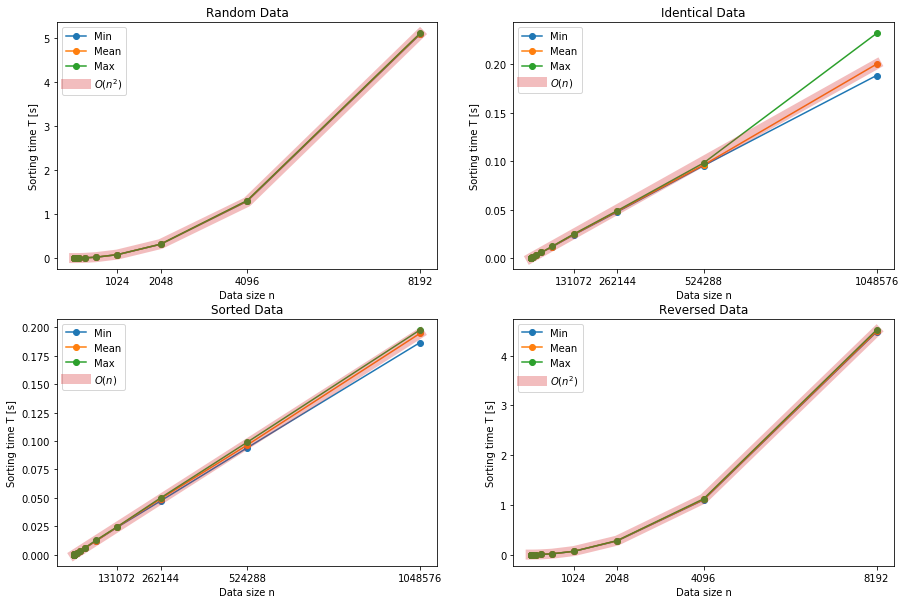

In [727]:
plot_data('insertion_sort', func=[n_squ, n_0, n_0, n_squ]);

### Merge Sort

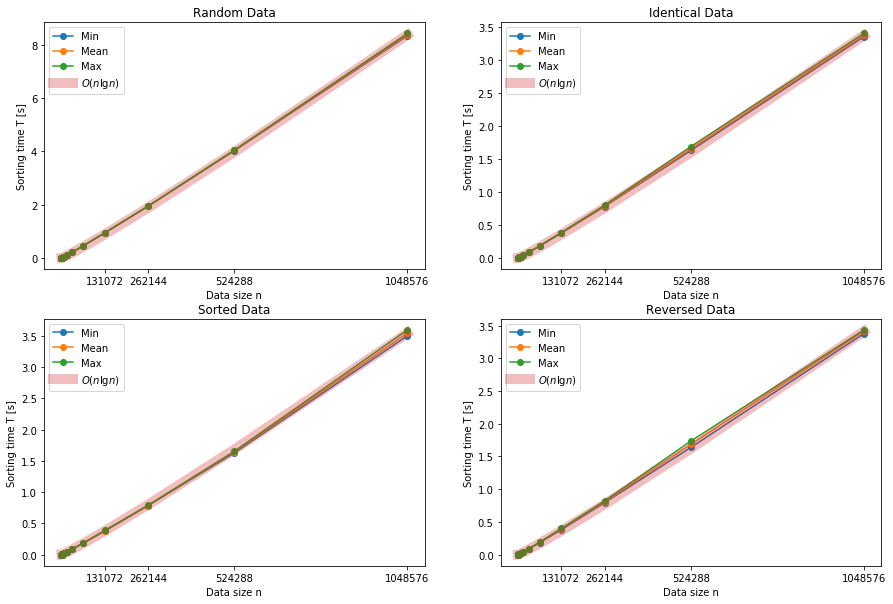

In [724]:
plot_data('MergeSort');

### Quick Sort

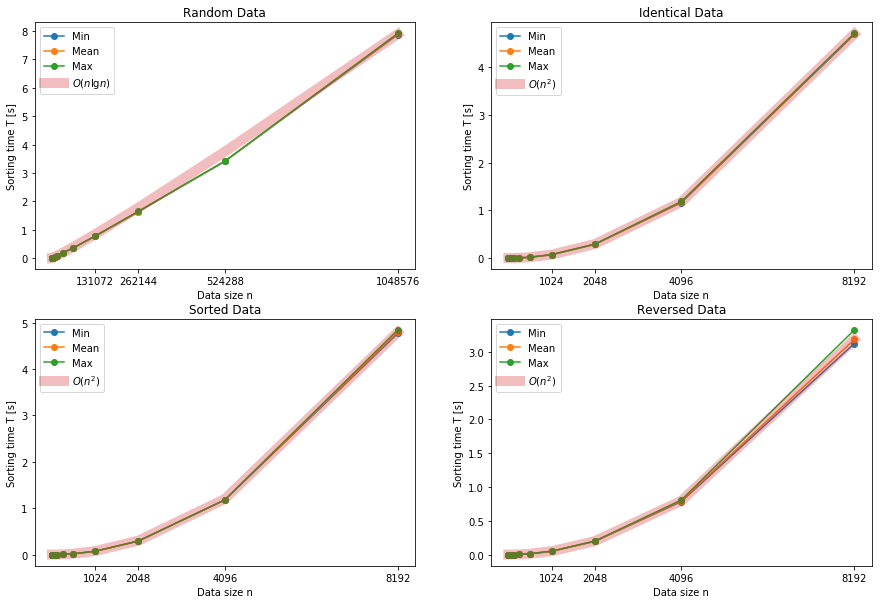

In [728]:
plot_data('QuickSort', func = [n_log, n_squ, n_squ, n_squ]);

### Heap Sort

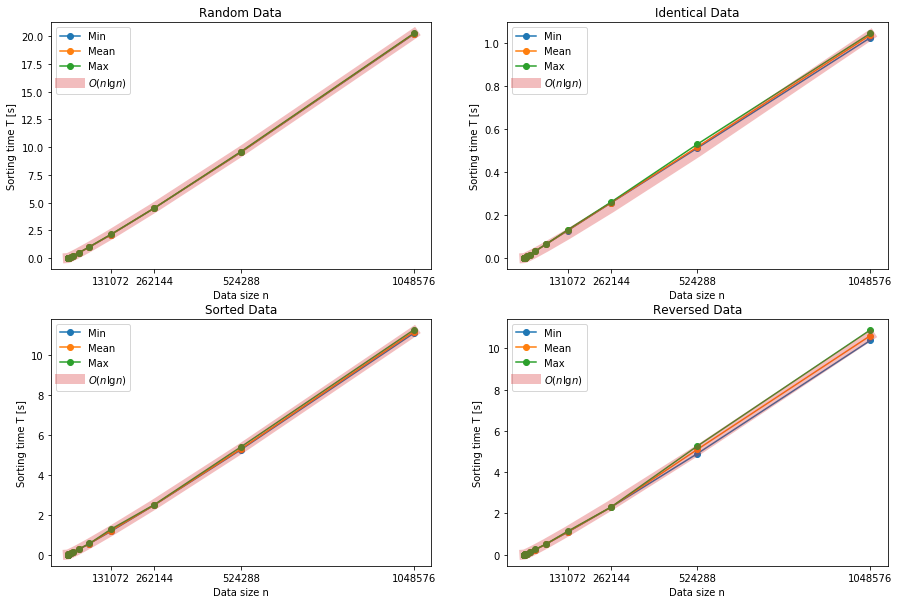

In [729]:
plot_data('HeapSort');

### Actual Result matches Expected Result

The increment in runtime according to size of the algorithms matches almost perfectly with the upper-bound complexity function from theory.

## Performance comparison between sorting algorithms

We first compare the performance between the algorithms in each kind of data.

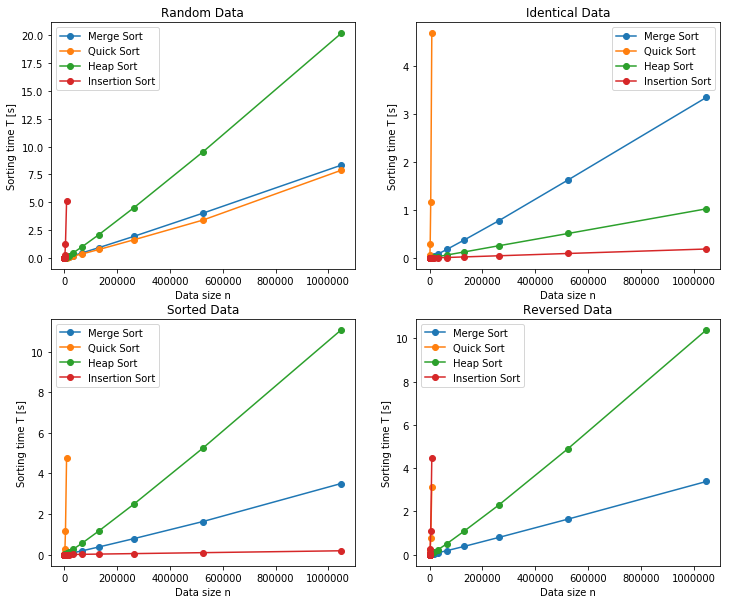

In [732]:
fig, axis = plt.subplots(2, 2, figsize=(12,10))

i = 0
for ax in axis.ravel():
    ax.set_title(title[i])
    ax.plot(problem_sizes, list(zip(*data[i]['MergeSort']))[0], 
            label = 'Merge Sort', marker = 'o')
    ax.plot(problem_sizes[:len(data[i]['QuickSort'])], 
            list(zip(*data[i]['QuickSort']))[0], label = 'Quick Sort', marker = 'o')
    ax.plot(problem_sizes, list(zip(*data[i]['HeapSort']))[0], 
            label = 'Heap Sort', marker = 'o')
    ax.plot(problem_sizes[:len(data[i]['insertion_sort'])], 
            list(zip(*data[i]['insertion_sort']))[0], label = 'Insertion Sort', marker = 'o')
    ax.set_xlabel('Data size n');
    ax.set_ylabel('Sorting time T [s]')
    ax.legend()
    
    i+=1


In randomly shuffled data, __quick sort__ was the fastest algorithm. However, its performance became worst when working with identical data and sorted data in ascending and decending order. From the graphs, we also observed that __insertion sort__ outperformed when working with identical and acsendingly sorted data compared with other sorting algorithms. Its time complexity remained extremely small with a huge amount of tested data. Nevertheless, insertion sort also showed its incredible jumpiness of runtime for random and reversed data. Besides, __merge sort__ did its work really stably with all kinds of data and performed very well with low range of runtime which were just approximate 8 seconds for random data and about 3 seconds for the rest. Lastly, these graphs showed the good performance of __heap sort__ which was also stable with all kinds of data, despite the fact that it was worse than merge sort. Identical data was the data that helped heap sort showed its best performance.

The following bar graph showed comparison of four sorting methods with real data.

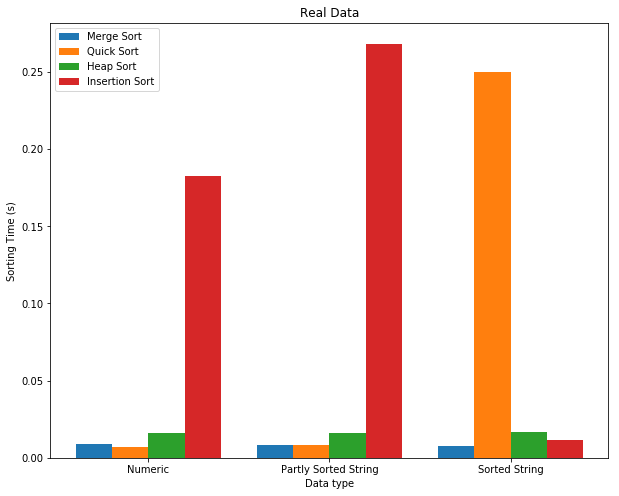

In [594]:
plt.figure(figsize=(10,8))
plt.title('Real Data')

bar_width = 0.2
index = np.arange(3)

plt.bar(index - 1.5*bar_width, list(zip(*real_res['MergeSort']))[0], label = 'Merge Sort', width=bar_width)
plt.bar(index - 0.5*bar_width, list(zip(*real_res['QuickSort']))[0], label = 'Quick Sort', width=bar_width)
plt.bar(index + 0.5*bar_width, list(zip(*real_res['HeapSort']))[0], label = 'Heap Sort', width=bar_width)
plt.bar(index + 1.5*bar_width, list(zip(*real_res['insertion_sort']))[0], label = 'Insertion Sort', width=bar_width)

plt.xticks(index, ['Numeric', 'Partly Sorted String', 'Sorted String'])
plt.xlabel('Data type')
plt.ylabel('Sorting Time (s)')


plt.legend();

The graph above showed the same behaviors of all sorting algorithms as before when working with numeric data. Quick sort still kept its highest position with shortest runtime compared with others, and this ranking was almost kept unchanged with partly sorted string data. However, there was a change in the case of sorted string data. At this time, merge sort outperformed instead of insertion sort, unlike array of sorted integer data. 

In [574]:
#chị Trinh
rand_res={'MergeSort': [(2.2747337596540028e-06, 3.1097281484566982e-06, 3.861348713058677e-06), (1.8229667478040627e-05, 2.222597892101942e-05, 2.606858868530189e-05), (3.390355521172022e-05, 4.144275351332479e-05, 4.9318697283022545e-05), (6.132312247704624e-05, 7.642569250123286e-05, 0.00011195656156097755), (0.00014716039277031014, 0.00018185064464939265, 0.00020236901387035917), (0.0003001805450268321, 0.0003695319618501478, 0.00042579487807436345), (0.0005552776271468848, 0.0007290268870954938, 0.0008830402296443225), (0.0013763103746560954, 0.0016851427423627008, 0.002043269254683887), (0.0036032969959555743, 0.004062857265424895, 0.00471961510587675), (0.005252830678679337, 0.006008720585913081, 0.00751505056215315), (0.013238627088364577, 0.014781689150346982, 0.016688146196222484), (0.025533642213991185, 0.033685278563623786, 0.04018488545230278), (0.04855480522640092, 0.06089095145891396, 0.07854478688651315), (0.11397298365790931, 0.13849412498146946, 0.15512277477258607), (0.2134876436442994, 0.23231828117218925, 0.2866738385861936), (0.5003240668585107, 0.6188610713023109, 0.6986109791190671), (1.1960404922014902, 1.2992093909063556, 1.3770051280491487), (1.964942998445224, 2.3552270748832145, 2.5421283114691278), (4.540105602080132, 5.362614582818571, 6.08989785716733), (10.033598415588642, 10.857521658309997, 11.801525490091706), (21.02830006500335, 22.704630297685366, 23.51087116014037)], 'QuickSort': [(4.975240110768667e-06, 5.8670908007701255e-06, 6.443973086390312e-06), (4.8561730445058305e-06, 6.459171564685748e-06, 8.183515962751236e-06), (8.178522678227827e-06, 1.2306936158507634e-05, 1.398935305131615e-05), (2.3353589365341075e-05, 2.752790734797014e-05, 3.085125858491694e-05), (4.4262090436763287e-05, 5.57730823999139e-05, 6.65474864656377e-05), (0.0001247607259559162, 0.00015550899905878525, 0.00017272409842419267), (0.0004039036782419075, 0.00042979648281313716, 0.00046872781821528584), (0.0006641234199130941, 0.0008394974156814671, 0.0009880024547875676), (0.0016521742925685128, 0.0018297544761307965, 0.0020462697367190177), (0.003495927662765297, 0.004263009538114293, 0.0046623515564712115), (0.007407159634902758, 0.008559355116593687, 0.009769936323709937), (0.014628989639894169, 0.015297341664026895, 0.015701194309685217), (0.035880685498267, 0.041428350447786394, 0.048439084056785583), (0.09610325283297243, 0.11328294743084144, 0.1379445988223324), (0.17570990599210745, 0.22078089659131592, 0.2714014323565266), (0.4319887884904574, 0.4784258777048384, 0.5706636813235187), (0.9260547853556318, 1.0671013787571837, 1.1922721933529488), (1.9721637022310006, 2.1155169674184435, 2.389930548955931), (4.002045517613624, 4.480394658313799, 5.240097239064426), (8.424879211443567, 9.477629845322236, 10.330004219521697), (13.930780839570843, 14.205804389062678, 14.450995008800191)], 'HeapSort': [(2.7706277598478175e-06, 2.9809611173645293e-06, 3.3497524049430655e-06), (6.966864853108443e-06, 7.000716001803305e-06, 7.039981246619307e-06), (1.3338218837269776e-05, 1.3719356288945413e-05, 1.5086049299469639e-05), (3.546673925266323e-05, 3.604894952698731e-05, 3.789984187026767e-05), (9.734827456708432e-05, 9.807526216503432e-05, 0.0001007637615316071), (0.00023800916900445124, 0.00025235406248085896, 0.00030193091837427496), (0.0005750374391957819, 0.0005804439275713077, 0.0005954511070062945), (0.001380789409836325, 0.0013843180268883518, 0.001390114580402242), (0.0031893755163210093, 0.0034678540472029814, 0.0038583461151485143), (0.007300693074367465, 0.007357463590259849, 0.007545526694704879), (0.016319928514609536, 0.016906932510830537, 0.01769980771195107), (0.039510722111840965, 0.04886668005209975, 0.06123489948657317), (0.08001125205750743, 0.08536240368276443, 0.09409266981672697), (0.17652026320691525, 0.18792666902352265, 0.2081875824422544), (0.37771927890533635, 0.3801022822163153, 0.3868628427411143), (0.8130050596245155, 0.8185864982912789, 0.8335700953764444), (1.7435180926240719, 1.8193958101291172, 2.0288782534983056), (2.394887156308414, 2.403375161083068, 2.414315582198924), (5.080061430151545, 5.203242341188206, 5.43290124418877), (10.932260713213282, 11.046516918000588, 11.227492653850959), (23.07996449519669, 23.198954623037025, 23.35465762954118)], 'insertion_sort': [(1.2864504121296003e-06, 1.2936765248031276e-06, 1.3008631993779911e-06), (1.8532925025458348e-06, 2.3839444081521384e-06, 2.6881818606745544e-06), (3.814965641386565e-06, 3.931323650074908e-06, 4.064213329441054e-06), (8.974138235772952e-06, 9.032182519242817e-06, 9.15811699655026e-06), (2.516158479073843e-05, 2.7448314565482148e-05, 3.064350395447047e-05), (7.943596336559689e-05, 8.016841621075383e-05, 8.089127032914727e-05), (0.00033842917941604285, 0.00034090674417418693, 0.0003457512228347821), (0.0012783210042205913, 0.001594132235751052, 0.0021285363835535994), (0.005302616339670479, 0.005352768954431372, 0.005411376639713617), (0.021601787826916227, 0.022253559033387216, 0.024226448501768673), (0.08728027126580855, 0.08769693951639056, 0.08837179686993295), (0.35586038325421515, 0.3583764091998091, 0.3629474055010178), (1.4757978126913258, 1.526873030414754, 1.706525052934012), (5.810306276443498, 5.945278811539447, 6.064289162672139)]}
real_res={'MergeSort': [(0.000917582891996298, 0.0010679692373666357, 0.0011735059515461778), (0.0009269751312733953, 0.0012400957325237971, 0.0015991048201710086), (0.0009248914333357826, 0.0013786971346111787, 0.0017565525680621125)], 'QuickSort': [(0.0008420429781717362, 0.001005733624066693, 0.0013559351821106256), (0.0011931931225830394, 0.0012769242684155695, 0.001564775210322535), (0.004399666792571886, 0.00458566993803536, 0.00528426305071331)], 'HeapSort': [(0.0014660603311495606, 0.0015651809671082385, 0.0018509644559059487), (0.0015410393094509854, 0.0018893835597498612, 0.002783084993322034), (0.001526629318731667, 0.0016396901383071783, 0.0019445823378854558)], 'insertion_sort': [(0.003712790062865259, 0.0037322235475032634, 0.003752014360994648), (0.004142951352102605, 0.004662127586284617, 0.005700504544248675), (0.002911724860291892, 0.0030745400268256512, 0.0033160047359230634)]}
identical_res={'MergeSort': [(6.680720918678238e-07, 6.925232746187895e-07, 7.649649430783367e-07), (3.5409842086931143e-06, 3.5862423596659484e-06, 3.6451800550976307e-06), (7.0070076637233775e-06, 7.104028060598896e-06, 7.223865370191219e-06), (1.3975913616404571e-05, 1.4747417380311622e-05, 1.7142792628967855e-05), (2.873094734551182e-05, 2.8842935140419418e-05, 2.8964486624358524e-05), (5.9102070073385006e-05, 5.942414105244537e-05, 5.969307228320239e-05), (0.00012270038468638805, 0.00012949881997699613, 0.0001407394767295833), (0.0002569865040397776, 0.00025988061701642166, 0.0002610781043711711), (0.0005403156678009642, 0.0005422506641198119, 0.0005441564764277788), (0.0011814678361184827, 0.0012462329371594574, 0.0014013071811919042), (0.0024939532991513206, 0.0025125842827902973, 0.0025433468757810537), (0.005267217148559101, 0.005307985484979925, 0.005337590812596016), (0.01103226223376118, 0.011629542902059661, 0.013189328960915089), (0.02294106045337685, 0.02307165964046489, 0.023364789529148045), (0.04794158487835548, 0.048387894770088945, 0.048802812579911654), (0.09892843159245786, 0.10569072807655175, 0.1250005892124591), (0.20521289577027346, 0.2070277157943201, 0.2107298251749853), (0.4454786496012275, 0.505703652737202, 0.5654888752885654), (0.8888097147830649, 0.9170507825122058, 1.0049805559885954), (1.8399109718966429, 1.898553806502696, 2.1112239273479645), (3.78501613681874, 3.8657945054986156, 4.044613647681217)], 'QuickSort': [(1.302441332497536e-06, 1.3084113488796532e-06, 1.3138168872108271e-06), (2.0036022621496675e-06, 2.0955605115312103e-06, 2.2666626489561688e-06), (4.108188069230875e-06, 4.57867220102608e-06, 5.322964741130334e-06), (1.0822642654875665e-05, 1.1004634546559987e-05, 1.1155161757543828e-05), (3.186560486321856e-05, 3.2224042575547026e-05, 3.2668276589150976e-05), (0.00010358715263907081, 0.00011012148312040926, 0.00011935331581982376), (0.0003588778063046024, 0.0003614946798005118, 0.0003633671338865436), (0.0013299712022696564, 0.0013920677543950318, 0.0015474735684942187), (0.005124353556178342, 0.0051729996693956806, 0.005235276412103597), (0.020987352529118652, 0.021167385448990567, 0.021424673084051653), (0.08594408310303454, 0.08702962154819337, 0.09063630511828553), (0.35531716737053404, 0.3613293140172876, 0.375270562564765), (1.4329103674781436, 1.4400035732883225, 1.4448763224017966), (5.784025499595373, 5.909966357868688, 6.071492000015041)], 'HeapSort': [(1.1926377964279646e-06, 1.2613816688973618e-06, 1.3802218176531964e-06), (2.667994140855934e-06, 2.7105402842924213e-06, 2.757961223508644e-06), (4.783935375166877e-06, 4.833391720173153e-06, 4.893979199680535e-06), (9.187755059874325e-06, 1.0007470916193155e-05, 1.0653303855389908e-05), (1.8006485082863844e-05, 1.8173077268787753e-05, 1.837476984534429e-05), (3.529940007378887e-05, 3.5573871261679264e-05, 3.5803631370087474e-05), (6.926569169950855e-05, 7.337075680485724e-05, 8.697802471272889e-05), (0.00013867537019326458, 0.00013955302113794745, 0.0001404040082356406), (0.00027929005762239174, 0.0002975045032053513, 0.0003569794704020067), (0.0005755917731052054, 0.000607354253825938, 0.0006399684532074373), (0.0013425214226419338, 0.001451724179332542, 0.0015690711882364577), (0.00236874274006041, 0.0025451315872583938, 0.002946153171010539), (0.004663789368079849, 0.004697356007421069, 0.004765526899704333), (0.009355367130294908, 0.009405715210338695, 0.009471344800894652), (0.018872285346097434, 0.020162356545770983, 0.02441870353264777), (0.03762775597621199, 0.038979799374916455, 0.04351485441946824), (0.07673242355811173, 0.08260138913785621, 0.10283225515737425), (0.15263865816685515, 0.15392763964020256, 0.15556305270350398), (0.30246775487239574, 0.3085725092468238, 0.3298360088648451), (0.6008840087736189, 0.6079454351238838, 0.6121231416047976), (1.2070975393726258, 1.209994183902745, 1.213878044422927)], 'insertion_sort': [(7.345966587656818e-07, 7.88473214822347e-07, 9.722347352126342e-07), (9.792010290348712e-07, 9.857259150272374e-07, 9.97073040243188e-07), (1.3250844281884253e-06, 1.4198037620986186e-06, 1.5823185685869418e-06), (1.97716960240242e-06, 1.987657170771301e-06, 2.000939606679437e-06), (3.285651302839109e-06, 3.3366658205878284e-06, 3.4784586753792644e-06), (7.013893038300151e-06, 8.242844485199788e-06, 9.746915368392529e-06), (1.1212686869148207e-05, 1.1496660339268998e-05, 1.1871006487942523e-05), (2.1445307261277455e-05, 2.2948094056043493e-05, 2.7886317711451677e-05), (4.214246227320154e-05, 4.241341870020228e-05, 4.275180510725059e-05), (9.40640359796647e-05, 9.500862207521401e-05, 9.590719138768536e-05), (0.00019715657728727273, 0.00021059827378388583, 0.00025437612957677027), (0.00040555581614711705, 0.0004084216811310026, 0.0004131160772990777), (0.0008116032456206587, 0.0008153043673052389, 0.0008203557383793411), (0.0016363610867822335, 0.0017348756660487408, 0.001941623810112128), (0.0032798497646735533, 0.003296312663906219, 0.0033414809380270002), (0.006613305966186468, 0.006713291202069874, 0.0068446002433852635), (0.013143108585281284, 0.013281879806513866, 0.013413635317550363), (0.02655016732367383, 0.02682090517395813, 0.026932638020374117), (0.053239298090877706, 0.053823092607183896, 0.05484705784905791), (0.10666940998925156, 0.1075191589087126, 0.10856981027359325), (0.21544017972883012, 0.21677955470744564, 0.21984498009987874)]}
sorted_res={'MergeSort': [(6.586172607343596e-07, 6.718846350522181e-07, 6.831826558812069e-07), (3.5787957398921475e-06, 3.624047863112144e-06, 3.6548609093694545e-06), (7.065031142056421e-06, 7.462579570593906e-06, 8.803311574760023e-06), (1.3925535747724644e-05, 1.403636417070579e-05, 1.4130045211781122e-05), (2.8721543278305445e-05, 2.889780765956026e-05, 2.9008298935100605e-05), (5.9330140441238686e-05, 6.26093641130192e-05, 6.99629869761381e-05), (0.00012472557249288435, 0.00012581261050876122, 0.00012697649868553395), (0.00025948379819201685, 0.0002618994539166754, 0.0002640774993095014), (0.0005385874319217017, 0.0005659274625503029, 0.0006120589004664536), (0.001168972017667642, 0.0011744849522507927, 0.0011789101446533698), (0.002476290745716407, 0.002905217469187393, 0.0038933669402443916), (0.005894939524714862, 0.005974709781934334, 0.006155146371181925), (0.011128482530803013, 0.011627307527089821, 0.01238715694211957), (0.02278495482613878, 0.023894750542283526, 0.027094704636207705), (0.047986679996817355, 0.04843751750213414, 0.04884961650501888), (0.10098447900309111, 0.10132265654996445, 0.10177820522085312), (0.2066606098160264, 0.2203963157114413, 0.25613294153863536), (0.43916045459324476, 0.44346264329584906, 0.44554168899958313), (0.9012479900252401, 0.9451934327517847, 1.049826847561235), (1.896430132705973, 1.9087202685286684, 1.9223619437170782), (3.9296039351793297, 4.0194841539860136, 4.0922220152588125)], 'QuickSort': [(1.319948357535064e-06, 1.4024163215103697e-06, 1.6446633750993778e-06), (1.5481150149187517e-06, 1.5722578152277438e-06, 1.617492420895292e-06), (4.138090466910541e-06, 4.169723389846041e-06, 4.2154042386761955e-06), (1.1091146103620744e-05, 1.1431968191915842e-05, 1.1901012755960637e-05), (3.174184483656975e-05, 3.207403760117974e-05, 3.25261155947705e-05), (0.00010345235947388604, 0.00010734001482443581, 0.00012064534692781362), (0.0003603731517481101, 0.0003649584940230798, 0.0003677577571536338), (0.0013292669282482412, 0.001343640013886191, 0.0013574196747241159), (0.005100242551721517, 0.005540684332473051, 0.007154604418435562), (0.020971157913826182, 0.02128213448054339, 0.02176326854893367), (0.08702125622858148, 0.08751218598514574, 0.08822912451317032), (0.3593562505308607, 0.3730271962736273, 0.4156363051182173), (1.4742974116470577, 1.6012719386611933, 1.8509775224947589), (5.873938182108759, 6.028490133542073, 6.34637862413183)], 'HeapSort': [(1.1982120330722874e-06, 1.2103287268065245e-06, 1.2157724317169506e-06), (3.1279450643903786e-06, 3.294950031775913e-06, 3.722040477523137e-06), (7.131251841707142e-06, 7.6821848488275e-06, 9.42097512917743e-06), (1.9605993773525672e-05, 2.2065116221551483e-05, 2.4043121386664307e-05), (4.051124418915241e-05, 4.566369585541733e-05, 6.29409440340882e-05), (9.52782906979307e-05, 9.556322041506296e-05, 9.630781327096449e-05), (0.00022753654695832184, 0.00022987967341316188, 0.00023122262657253485), (0.0005269335903865324, 0.0005534802144517269, 0.0006438243773162998), (0.0012149288536526775, 0.0012315422934130176, 0.0012665952336252126), (0.00277073052992553, 0.0027903921592338375, 0.002817081626152062), (0.006227196286470391, 0.00671135282268839, 0.007507365637063887), (0.01362377495547662, 0.013697897461828586, 0.013881080239760498), (0.0300868399394858, 0.03063164051956733, 0.032354725864138345), (0.06554381971678734, 0.06698455678502237, 0.07026371863545276), (0.14031342845074896, 0.14210404786247507, 0.144319312972844), (0.30005416953349595, 0.3168992788799187, 0.34066107738453866), (0.6400214017171493, 0.6791510778784868, 0.8104072028372684), (1.3690690062830981, 1.4086927466043562, 1.5574128630778432), (2.9185951654162636, 3.0050767306689523, 3.209891546891413), (6.177956611153604, 6.728041267681147, 7.568517427384904), (13.251022378670314, 13.333726217674302, 13.39760969805684)], 'insertion_sort': [(7.404453867611417e-07, 7.451602463385943e-07, 7.506094034122113e-07), (9.965663486999497e-07, 1.0049604278274218e-06, 1.0270660412732895e-06), (1.3318871153659359e-06, 1.4197616971930414e-06, 1.585343282688232e-06), (2.0043584164299587e-06, 2.436547008493622e-06, 2.9453702051402267e-06), (3.7965762904927703e-06, 4.106440534631277e-06, 4.274115589573563e-06), (5.951291384718736e-06, 6.6005644717606054e-06, 8.624148106172304e-06), (1.1048607648732133e-05, 1.114512168594062e-05, 1.1202628556241442e-05), (2.1603072020943093e-05, 2.221541062198726e-05, 2.372254314380716e-05), (4.22145900441668e-05, 4.3691602063150764e-05, 4.759714077582545e-05), (9.399159513707642e-05, 9.448374262852746e-05, 9.510779125766938e-05), (0.00019660916733417613, 0.00019881676945237726, 0.00020358765141715665), (0.00040616061207609047, 0.00042228074442637626, 0.0004807051835915895), (0.0008133451672673992, 0.000820368762475859, 0.0008315920595968488), (0.0016451517235584567, 0.0017342785623672284, 0.0019275270794660833), (0.0032970009675158635, 0.0033669126328346338, 0.003494242299636645), (0.0066547403938304545, 0.0067002153476538396, 0.0067618202568269226), (0.013436041374544901, 0.015394661793916511, 0.020300015960408056), (0.027171674321982357, 0.027397294924009438, 0.027755390215330605), (0.05470983503316044, 0.05513441013494634, 0.05559228102093686), (0.11022104126297766, 0.1176511329985361, 0.13403358806741986), (0.2191475806175731, 0.22120465439838882, 0.22254790677525307)]}
reversed_res={'MergeSort': [(6.758688195634259e-07, 7.204730411791964e-07, 8.482258442454993e-07), (3.7472556854251857e-06, 3.847058000181943e-06, 4.051356265934392e-06), (7.084846761335643e-06, 7.345836917270974e-06, 8.281640226632105e-06), (1.3971189177961525e-05, 1.4120369703021445e-05, 1.421642972867447e-05), (2.860669995249508e-05, 2.91489219947222e-05, 2.9572866555703293e-05), (5.9119183350867516e-05, 6.233737060687323e-05, 6.707967686054046e-05), (0.00012357106796782858, 0.00012414134643506838, 0.0001247024456627823), (0.0002568912494742431, 0.00025832043220931747, 0.0002601001009277426), (0.0005424136749007051, 0.0005767082456045529, 0.0006346356008385687), (0.0011705681689344165, 0.0011767985158361047, 0.001190999402785558), (0.002479995773655201, 0.002511747551551684, 0.0025347169933061546), (0.0052523297347838805, 0.005583463907722499, 0.006458581517686651), (0.010943708475189811, 0.01098061565348377, 0.011052262402343964), (0.022818928960336136, 0.027569788847679112, 0.03933959995065999), (0.054379503366550015, 0.06185856172676935, 0.06599398802031561), (0.10057503335701767, 0.10396004759315473, 0.11238072248852404), (0.20642743373255143, 0.22574382562348547, 0.29019291956674353), (0.4343292924762257, 0.44347427549037094, 0.46781125940682006), (0.8979679772526197, 0.9407735789525304, 1.0655263187904893), (1.9049946210602684, 1.9376753097166328, 1.9947115329787266), (3.8896245386085866, 4.321450222950352, 4.911494204810424)], 'QuickSort': [(1.3177232476369335e-06, 1.3936973250445262e-06, 1.6297550178883705e-06), (1.443246252054829e-06, 1.4572871884633972e-06, 1.4675619069619122e-06), (3.6338698154854087e-06, 3.886032804138413e-06, 4.714957494241639e-06), (9.207942918325493e-06, 9.251662832584245e-06, 9.32524898776502e-06), (2.507872121378316e-05, 2.575282816282401e-05, 2.6594436763751773e-05), (7.513111599403759e-05, 8.106826947243093e-05, 9.454676818646776e-05), (0.0002495000205980092, 0.00025376206334303485, 0.00026299391957687504), (0.0008879160031383558, 0.0008929252211219381, 0.0008971057743697874), (0.0033285549887943364, 0.0034723166461968135, 0.003747587176547899), (0.014127034208533068, 0.014258038134266826, 0.014331607692020043), (0.05915581393941573, 0.05930981865000349, 0.05954827193037251), (0.23818258363985478, 0.24433989196509173, 0.2592637505085804), (0.9526202848746834, 0.986154723393247, 1.051711757259909), (3.8318661309267554, 3.8793983950612527, 4.041038458467483)], 'HeapSort': [(1.210794432528407e-06, 1.2355319231061408e-06, 1.2792927509587097e-06), (2.65343164839281e-06, 2.8361695051688415e-06, 3.3460504230658897e-06), (5.23841385091214e-06, 5.276669498895867e-06, 5.334767933981882e-06), (1.3716103388839052e-05, 1.3815670484391033e-05, 1.387847555781397e-05), (3.17756974611168e-05, 3.398737750695365e-05, 3.9399815214517805e-05), (7.809430320059595e-05, 7.867658954842153e-05, 7.952661419023753e-05), (0.00019061824067392213, 0.00020292026022735506, 0.00023483235634780497), (0.0004474669009376162, 0.0004492758386935887, 0.0004542457223247643), (0.0010346827596001708, 0.0010399283314898766, 0.0010502827698216732), (0.002381379740028564, 0.0025119788630567695, 0.002872811588032792), (0.0053712512688154955, 0.0059453877529799335, 0.007045537873706893), (0.012159248867564284, 0.013502066966559527, 0.01539767694776222), (0.027121722255189426, 0.030300837400883775, 0.035778984604557744), (0.05829824705377926, 0.059223348645408645, 0.06147983786484153), (0.12708685752079418, 0.13381172000622427, 0.15646622672136345), (0.27736198173079174, 0.27864813751834844, 0.2792715053049051), (0.5941295431134677, 0.62437351508961, 0.7176030076448114), (1.2849442909109712, 1.298390575641497, 1.3374267760955263), (2.722386652626483, 2.794318927405038, 2.964043974257038), (5.832154274831737, 6.146322515899556, 6.523170115144239), (12.283971900267716, 12.710109669546728, 13.085893113056045)], 'insertion_sort': [(7.433906563181347e-07, 7.964897058378642e-07, 1.0024791797333278e-06), (1.1058339441659968e-06, 1.1224306636353838e-06, 1.1415068261976566e-06), (2.065670914929036e-06, 2.1841105129260035e-06, 2.511915704175865e-06), (5.669005080841692e-06, 5.731771270222497e-06, 5.792962065010922e-06), (1.9468728465614986e-05, 1.9649603217545404e-05, 1.980115663727613e-05), (7.426411628590959e-05, 8.924963267980992e-05, 0.00010044767430701486), (0.00035333523803641185, 0.0003740689036595722, 0.00039804864019743713), (0.0014740514024201442, 0.0016758271838444613, 0.0019324312843703641), (0.005618870004524069, 0.0059776105343582455, 0.006629392959097458), (0.025002335842289444, 0.025720056652426136, 0.026626661574171425), (0.08038638887025557, 0.08445603115251288, 0.09866022149127765), (0.3299465653981315, 0.33253963245818646, 0.33422994998666883), (1.3849952292794114, 1.6216768606758705, 1.8010997365654475), (5.444214123613165, 5.587208159262263, 5.851537844547238)]}

In [581]:
# 
rand_res={'MergeSort': [(1.0720941132640672e-06, 1.0757234699993608e-06, 1.0813312178301355e-06), (7.83753754778189e-06, 7.871643362609123e-06, 7.903785000375437e-06), (1.5262484415613854e-05, 1.5393802898448898e-05, 1.5494464974535987e-05), (3.115625927244078e-05, 3.217211490775826e-05, 3.278508483197975e-05), (6.511681952195047e-05, 6.541633504334002e-05, 6.567927188738083e-05), (0.00013340486496189738, 0.00013419778327855637, 0.00013612334347220346), (0.00027869091730810513, 0.00028210813665038555, 0.00028461390176802865), (0.0005780368074299942, 0.0005815526040340253, 0.000584506877694923), (0.0012185278200213317, 0.001225232686516025, 0.0012426661698976662), (0.0025925907821158995, 0.0026750307248164366, 0.0027534899272485657), (0.005663277184085864, 0.005728973322833406, 0.005853851816992616), (0.01165247978472161, 0.011937758842972948, 0.012076884802966214), (0.024112112499795595, 0.024216188729525773, 0.024451947586529545), (0.0502192784093495, 0.05068692254173583, 0.05103916177563406), (0.10465237730336412, 0.10500208497954192, 0.10571290087500529), (0.21723928226638237, 0.21746101258895578, 0.21801115136959198), (0.452343663037027, 0.4546318878044379, 0.4598262649777401), (0.9378764269879412, 0.9411605115681141, 0.9493779479137174), (1.9393160015497415, 1.9415156692045457, 1.943778938691139), (4.024438918632313, 4.034320185730939, 4.049231686455187), (8.332394096976259, 8.369180418145152, 8.41831914807699)], 'QuickSort': [(2.000342247619008e-06, 2.005553048633034e-06, 2.0159526592760452e-06), (2.5171462291798305e-06, 2.5244623944989116e-06, 2.5400815193108836e-06), (3.936534163755723e-06, 3.955416910810019e-06, 3.984471513942358e-06), (1.0132070985442793e-05, 1.0173406755413188e-05, 1.0252186929740646e-05), (2.2200458795255006e-05, 2.2309178443776173e-05, 2.260380133481752e-05), (5.366992043341829e-05, 5.4478260859698855e-05, 5.575530382769541e-05), (0.0001490574505761607, 0.00014948803174158462, 0.0001501099178836093), (0.0003262922639116214, 0.0003269526217736652, 0.0003280550773258725), (0.0006988419931703252, 0.0007008739847456777, 0.0007032736413965982), (0.0014290858160947004, 0.0014334921523955868, 0.001440741961720393), (0.003589479892970528, 0.0036049752976709064, 0.003616484806495976), (0.007411274251319525, 0.007440735928201239, 0.007485467614796746), (0.017551614509541156, 0.017577923147977695, 0.017609271946655593), (0.037504390193050685, 0.03791236394036551, 0.03859002074908925), (0.08509333483520247, 0.08535909150643117, 0.08574267464856196), (0.17956689693414774, 0.18031985994703062, 0.18229661778203385), (0.3597328343794288, 0.3609033811560948, 0.3624855004319822), (0.7707520888195631, 0.7721148064268618, 0.774604323218), (1.6319513303765234, 1.6384966301837267, 1.6454709863573953), (3.403381819774495, 3.4090750370773093, 3.41919068659854), (7.875487751527089, 7.892206272460498, 7.915211020980223)], 'HeapSort': [(1.5970794770841598e-06, 1.6020606714172707e-06, 1.610075879197579e-06), (3.942968239321879e-06, 3.952019675252408e-06, 3.963944842245139e-06), (7.507269097354808e-06, 7.5173671321003124e-06, 7.529843855534058e-06), (2.0248398660334894e-05, 2.0375512528263795e-05, 2.053840301650213e-05), (5.540857324993977e-05, 5.590683962614049e-05, 5.711436119342779e-05), (0.00013598947078493598, 0.00013869893487409587, 0.00014707541833416314), (0.00032731691221708146, 0.0003290471336898286, 0.0003322954065414841), (0.0007839412411944194, 0.0007869282249613591, 0.0007899361488900588), (0.001816277907692607, 0.0018417612764099985, 0.0019152975188641873), (0.004149420083025032, 0.004164356143717903, 0.004179356411013074), (0.009257052179186253, 0.009271297590518972, 0.00930626111006758), (0.020643195846824544, 0.020717650694936012, 0.0208175430250739), (0.04534118131738813, 0.045483708792558405, 0.04578840594145235), (0.09893870584185359, 0.099091561245016, 0.09927073036760703), (0.21395326346237198, 0.2145771985725696, 0.21567745337815722), (0.461443238209237, 0.4656700483347171, 0.4741967898332102), (0.9893131286582957, 1.0004328110359892, 1.02216791224987), (2.109193764290012, 2.119824600028187, 2.1443511276243044), (4.49712341087843, 4.502101192904138, 4.506118689665982), (9.515338679756042, 9.537835865175657, 9.584178276276361), (20.16010424328897, 20.194598509168646, 20.233558670414368)], 'insertion_sort': [(1.149958181639345e-06, 1.154006338298571e-06, 1.1579155700933453e-06), (1.5904937827946496e-06, 1.600400117658722e-06, 1.615402234261136e-06), (3.4153851597384865e-06, 3.4289695759500215e-06, 3.4468117058735817e-06), (7.929841908064418e-06, 7.946388101014359e-06, 7.960514239192778e-06), (2.21021927295097e-05, 2.2886003853578353e-05, 2.3569504318546617e-05), (6.972950192009087e-05, 6.980509880842199e-05, 6.991894179689143e-05), (0.0002964588995451118, 0.00029805930502330586, 0.0002992378420467067), (0.0011076808450079245, 0.0011217742935872104, 0.001163968183532249), (0.004673860927564076, 0.004698009208129647, 0.004714045448227842), (0.018904408584594936, 0.019020914981706053, 0.019151725189770007), (0.07681310623096439, 0.0770558819594883, 0.07737101166430176), (0.3125720000614365, 0.3136087440572055, 0.31524720234426695), (1.287365365218193, 1.2955602166558493, 1.3042773085389854), (5.077428688294731, 5.086350125241006, 5.098185754896349)]}
real_res={'MergeSort': [(0.008575840574755194, 0.008700005584923615, 0.008744094511430062), (0.008622783756577676, 0.008642306470555295, 0.00865496523997849), (0.00782602298616933, 0.007948798272040522, 0.008002136802248046)], 'QuickSort': [(0.00721018282746607, 0.007255705604349886, 0.0073024093457485445), (0.007090399115879581, 0.007135298608881521, 0.0071773504272744934), (0.23742518393610226, 0.23815338509091816, 0.2403587188839083)], 'HeapSort': [(0.015523862277015204, 0.01559011892614286, 0.015664179292683017), (0.015859389618006908, 0.015947997298552227, 0.01606079451649416), (0.016070748624095417, 0.0164962154817893, 0.016770271514932603)], 'insertion_sort': [(0.1811143708473537, 0.1820457754939222, 0.18419168310280534), (0.2580994202448892, 0.27128721460953786, 0.3038210592605992), (0.012001070910255622, 0.0121557018962876, 0.012320224703348303)]}
identical_res={'MergeSort': [(5.749716982497385e-07, 5.783140778710802e-07, 5.865550028463862e-07), (3.1680601677616027e-06, 3.2479432370540342e-06, 3.3365951099575296e-06), (6.3030172638095815e-06, 6.3520082656934965e-06, 6.418359991537196e-06), (1.25939473678179e-05, 1.264758835024994e-05, 1.274120665682089e-05), (2.5734999034512175e-05, 2.578341636742393e-05, 2.58847597977318e-05), (5.3534564590693776e-05, 5.4156524142223894e-05, 5.526440691951993e-05), (0.00011105742240112709, 0.00011142272996949032, 0.00011179586809544555), (0.0002322054333605521, 0.0002325229992269738, 0.00023285951040782085), (0.0004832042459103466, 0.0004920078573298328, 0.0005032515869613318), (0.0010411580060743816, 0.001043642434042892, 0.0010486237865035193), (0.0021979047516620556, 0.0022062100134111274, 0.00221138808373085), (0.004667162983177754, 0.004717328138159817, 0.004773414642160056), (0.009708859484894673, 0.009819835010704082, 0.010065558811502342), (0.020303235103199313, 0.020589049865613638, 0.021636451055693822), (0.04208205072484361, 0.04255618209238795, 0.043237868007414214), (0.08754529544607219, 0.08788271321548109, 0.08906759600434573), (0.1814688837423546, 0.1825680159395385, 0.18464774275131882), (0.3765768902344462, 0.3796713829492546, 0.3857944151372976), (0.7785034909895785, 0.7848304510553135, 0.7984086457531703), (1.6267778504061425, 1.6499561101846667, 1.6864037146197006), (3.3476852744693133, 3.367580132335115, 3.396044853514013)], 'QuickSort': [(1.1732326463326661e-06, 1.1761667945377595e-06, 1.1793720215335244e-06), (1.35441057240738e-06, 1.3647714302034552e-06, 1.3881853737715173e-06), (3.5839366649039812e-06, 3.587546910995854e-06, 3.596082157348277e-06), (9.441325738049479e-06, 9.46363997505601e-06, 9.501832270344713e-06), (2.7150871371767536e-05, 2.7247164834372543e-05, 2.735536886071009e-05), (8.497530245547698e-05, 8.53897472728676e-05, 8.570779626080604e-05), (0.00029253206768786917, 0.00029327783863243725, 0.0002942045887896963), (0.001083226633754948, 0.0010898411292649913, 0.0011036753935733722), (0.004139405013773967, 0.004153670388909631, 0.004179141936570356), (0.016876397216007415, 0.01693115092198847, 0.017076551460877453), (0.06994714828085004, 0.07107518764342483, 0.07321579699600989), (0.2871487605891616, 0.2887142588139568, 0.2924577784528992), (1.161283550961798, 1.1665654612468643, 1.1850022556463955), (4.680931567728294, 4.692570930549482, 4.70298342654587)], 'HeapSort': [(1.0940770220538418e-06, 1.0981895645882176e-06, 1.1017638766749868e-06), (2.3388834730829722e-06, 2.352770841023739e-06, 2.3842204830231277e-06), (4.190160652272797e-06, 4.201497258351379e-06, 4.22547335274973e-06), (7.825602399124824e-06, 7.860577067990146e-06, 7.926281190880635e-06), (1.5085280152095763e-05, 1.5124959761833276e-05, 1.5210571882581736e-05), (2.963075318307238e-05, 2.9649432572836756e-05, 2.968302683131687e-05), (5.876859898412023e-05, 5.906733766265486e-05, 5.967888276548308e-05), (0.00011725855669091404, 0.00011734622643967476, 0.00011747558885753197), (0.0002345959579558064, 0.0002350938035622986, 0.00023560566919125867), (0.0004855673192676718, 0.0004911904525041761, 0.0004972400864294614), (0.0009823466685443887, 0.0009837749851896035, 0.000988380084882001), (0.0019939892428142577, 0.0020013187769580393, 0.0020134891255856272), (0.003985666594984179, 0.004018617036057446, 0.004063420183600926), (0.007964217262079113, 0.007997627584496337, 0.00806210752482677), (0.01595388773585587, 0.016049051917408148, 0.016146988975892344), (0.031934072841801435, 0.03213064063678053, 0.032726866063116644), (0.06376858774922312, 0.06397654525998178, 0.06460521068538583), (0.12754215328038754, 0.12881874103641167, 0.13122848531486397), (0.25657266338635054, 0.2573800880753879, 0.260037057453701), (0.5118385878799927, 0.5173708663785874, 0.5300831545596338), (1.0257098174943167, 1.0375375964762497, 1.0457136745644675)], 'insertion_sort': [(6.571751538911385e-07, 6.641156945101879e-07, 6.731215803317861e-07), (8.768049108030407e-07, 8.967820141585723e-07, 9.188667874584055e-07), (1.173550704104613e-06, 1.1802268685357367e-06, 1.1891405921628193e-06), (1.7583106048526504e-06, 1.7798843955752494e-06, 1.842576716357978e-06), (2.83142746446883e-06, 2.869825145112983e-06, 2.8990647936728796e-06), (5.015259785168533e-06, 5.133634924293826e-06, 5.2599619802899565e-06), (9.257891223829112e-06, 9.416390554711624e-06, 9.629533961562132e-06), (1.8070340211304598e-05, 1.8510692050157375e-05, 1.9869698920626993e-05), (3.5303910779236356e-05, 3.572674264582711e-05, 3.6289849154870556e-05), (8.17198862944974e-05, 8.334933743758074e-05, 8.466537250419519e-05), (0.00016699502176466686, 0.00017070475206698585, 0.00017798067527621304), (0.00034315770826102467, 0.0003469048603040442, 0.0003532303847071232), (0.0006877742037865302, 0.0007016328383126758, 0.0007161746294553278), (0.0014016713863410383, 0.0014396676304349704, 0.001518697251190493), (0.002742036832907096, 0.0028371080329196914, 0.0029088972279664805), (0.005776843379186006, 0.005838207359197122, 0.005909381373416985), (0.011641350587545757, 0.011930334342646615, 0.012159387944644977), (0.024032454112030546, 0.024431664599033842, 0.02489157419475349), (0.04759147002940673, 0.04823976010640243, 0.0488600120642808), (0.09539323210926588, 0.09606311486275611, 0.09815053547233467), (0.18844767725313433, 0.20015360013101596, 0.23187578186716565)]}
sorted_res={'MergeSort': [(5.755392512104033e-07, 5.817232256877872e-07, 5.863189336149369e-07), (3.1568582782358778e-06, 3.249308785852399e-06, 3.3509334541395787e-06), (6.19107936465433e-06, 6.27286564170567e-06, 6.400407449452065e-06), (1.2591783699877277e-05, 1.2849949451442804e-05, 1.3486628188298747e-05), (2.5874364979276995e-05, 2.6235031014053395e-05, 2.6883856215138442e-05), (5.29155992686644e-05, 5.318877933734643e-05, 5.365101310175095e-05), (0.00010994410144973941, 0.00011039735964463099, 0.00011092222051269848), (0.0002300053974020685, 0.0002338722030499643, 0.00024098407169759694), (0.0004766837401031232, 0.0004886780281163183, 0.0004982615362942866), (0.0010252052247237094, 0.0010391299420436863, 0.0010567622445599209), (0.0022044322946679013, 0.002325566955086096, 0.0024378070428929073), (0.004593871374951059, 0.004702693466714856, 0.00506098559949373), (0.00967177749071554, 0.009761080852329579, 0.009844457725220683), (0.020093639191018156, 0.020482475078380958, 0.02091504718084252), (0.042073304050707826, 0.04220242771643825, 0.04250603923480867), (0.08647222786369942, 0.08787673987703783, 0.09032740152383667), (0.18043464285983646, 0.18148431960738284, 0.18467732499872605), (0.37603663495883666, 0.37887736508649444, 0.3851064382536909), (0.7817757426710159, 0.7843740879993675, 0.7878580234169021), (1.6261588987663345, 1.6418250881353742, 1.653143597349299), (3.5007256183962454, 3.543564012285242, 3.593980240196288)], 'QuickSort': [(1.2103788792649884e-06, 1.22928155300471e-06, 1.2396247651602937e-06), (1.3552074073325124e-06, 1.3882278589401195e-06, 1.4662442396839995e-06), (3.599476227878837e-06, 3.7271829590147703e-06, 3.7858896494771426e-06), (9.367310732320695e-06, 9.426261165315972e-06, 9.509733558490869e-06), (2.6945426949656768e-05, 2.7155400683199334e-05, 2.745460586936145e-05), (8.52443065273986e-05, 8.570430287465543e-05, 8.623510020585265e-05), (0.0002953639566347268, 0.00029838315814650814, 0.0003033612808242047), (0.0011145452811808022, 0.001138362655718417, 0.0011576714228790958), (0.0042035186401414605, 0.004216415609602257, 0.004232682877591288), (0.01707591096991846, 0.017151459478827746, 0.017269323548746263), (0.07091444984701714, 0.0715410852854499, 0.07177347280224543), (0.2904382211738721, 0.29131322992056996, 0.2925206407287533), (1.1781716009290903, 1.178579039498618, 1.1797383222656208), (4.769660674554871, 4.795594179351428, 4.843950231282179)], 'HeapSort': [(1.0934465972950459e-06, 1.0958470648961494e-06, 1.1019699967492216e-06), (2.7665209570947345e-06, 2.78835547096221e-06, 2.8437046444551916e-06), (6.268267880997899e-06, 6.2990754540528986e-06, 6.364911514504163e-06), (1.4230339747615977e-05, 1.4296278754375306e-05, 1.4441884711738974e-05), (3.3990878959563985e-05, 3.434153935033226e-05, 3.559631658587924e-05), (8.088531510081225e-05, 8.098007317056072e-05, 8.113573331979767e-05), (0.00019190640832861573, 0.00019267554325593485, 0.0001940892514338746), (0.0004409404069272238, 0.0004430308411890017, 0.00044728857433816644), (0.0010259390940167248, 0.0010292012749458022, 0.0010349161448363349), (0.0023266653970025405, 0.002334789297518581, 0.0023421896669002444), (0.005246112236633772, 0.005269981861281966, 0.005336139740675354), (0.011589110044412316, 0.01162068472768772, 0.01171029671112867), (0.025578958351592844, 0.02580998286782396, 0.02602572614024468), (0.055519999969672225, 0.055823508771855906, 0.05642017258964592), (0.1193053304492019, 0.11993279014511954, 0.12044671216386228), (0.2569768592868513, 0.2620621898486661, 0.2685342735935592), (0.5469518622876421, 0.5493279425375477, 0.5538735393051866), (1.168693903951862, 1.2015466964308872, 1.2721191299860948), (2.4744156226124687, 2.4819346334730654, 2.4986759099811024), (5.2413137703651955, 5.277077228439157, 5.380649569265188), (11.069793055112314, 11.14428502267874, 11.23387895513224)], 'insertion_sort': [(6.628407077635815e-07, 6.727680174472273e-07, 6.868507827860452e-07), (8.775798675057939e-07, 8.829025720460682e-07, 8.905755828644571e-07), (1.1785298563372274e-06, 1.265434962954099e-06, 1.3471047150786767e-06), (1.7390899613719664e-06, 1.7626941616442033e-06, 1.7956001016971e-06), (2.9004699927973917e-06, 2.936384074369293e-06, 3.0253026422096725e-06), (4.9300911193879285e-06, 4.95057639167211e-06, 4.96232342823836e-06), (9.195959753943377e-06, 9.266373227200065e-06, 9.38420249548215e-06), (1.809617600642179e-05, 1.8141811802752572e-05, 1.8194360742431172e-05), (3.5087279168456863e-05, 3.555330010873628e-05, 3.650758446087482e-05), (7.961509508260938e-05, 8.089570768462812e-05, 8.222582478061276e-05), (0.00016651806822423786, 0.00016889416002323175, 0.00017178190169396507), (0.0003325091384885446, 0.0003451591094517192, 0.0003539074587856692), (0.0006783772572282719, 0.0006977682123409227, 0.0007275305748865461), (0.0014209648310428114, 0.0014543453800124177, 0.0014741744470803525), (0.002755932087178995, 0.00287866929244382, 0.003022334854192433), (0.005600143614769661, 0.00574127897329964, 0.005948347933066803), (0.011817803100397907, 0.011988952114166925, 0.012460925765589352), (0.024055692626284833, 0.02437984579178697, 0.024572686647691928), (0.04721930801865494, 0.04908326050871047, 0.04989460511638927), (0.09394054723336674, 0.09636516409022575, 0.09882777241389042), (0.18668066893042123, 0.1947675641275661, 0.1977899406325984)]}
reversed_res={'MergeSort': [(5.911950896339517e-07, 5.960272923559864e-07, 6.039310370855111e-07), (3.151972107399987e-06, 3.1965436831908628e-06, 3.2440997172540215e-06), (6.25945196239047e-06, 6.533908833988991e-06, 6.862065905449876e-06), (1.2607931370682048e-05, 1.2988385452960543e-05, 1.39849523842896e-05), (2.556808002265661e-05, 2.5725926588412916e-05, 2.6229385996614228e-05), (5.2890356656849084e-05, 5.412776681992116e-05, 5.5422435036799166e-05), (0.000110300498662338, 0.00011150655690558232, 0.00011314315777834383), (0.00023057242076651954, 0.00023223791736968826, 0.00023437561701867166), (0.0004761956400624751, 0.0004810967073967374, 0.0004874555300372472), (0.00102697952023076, 0.0010278000045772595, 0.0010289160780079189), (0.0021906519949603217, 0.002195236253944091, 0.0022003305346199498), (0.0046890475313588875, 0.004818555605719814, 0.005137658993385339), (0.009593118941684225, 0.009640424368717504, 0.009751275876642467), (0.02010637093520927, 0.020578499053655833, 0.02229449013575504), (0.04190174474166744, 0.04228579948485276, 0.042710557026072384), (0.08808844257616026, 0.08880400111271836, 0.08969422765017043), (0.181611769790076, 0.1853317942979326, 0.19003939179659332), (0.37838273473820055, 0.3903834560901183, 0.3990256442054185), (0.7922128715772487, 0.8057004990865607, 0.8201538731977962), (1.6398753904713885, 1.6877032855067227, 1.7371230467897476), (3.3795823327991457, 3.4155479741564703, 3.4347975976943417)], 'QuickSort': [(1.1769505666905575e-06, 1.1833265942297089e-06, 1.1922896214782229e-06), (1.2530324324761113e-06, 1.2629468226280078e-06, 1.2719655265130791e-06), (3.1793294637172125e-06, 3.1868461622954896e-06, 3.1974321702591054e-06), (8.064128871646303e-06, 8.095971577421566e-06, 8.152408460020997e-06), (2.1483062503823912e-05, 2.1519071833844813e-05, 2.154465611606341e-05), (6.332016946598329e-05, 6.351668243688561e-05, 6.378382908151188e-05), (0.00020629169282347087, 0.00020741449022784362, 0.00021111289735279245), (0.0007463368021246091, 0.0007480912330735457, 0.000750660617241842), (0.002759839506691892, 0.0027867944910177655, 0.002843208515831126), (0.011644497378499584, 0.011895573396370394, 0.012210112331442445), (0.048497196093237674, 0.04920378378615819, 0.05053403677318004), (0.19552974314835106, 0.19713469385127003, 0.20042456214014237), (0.7846887407122267, 0.7939948606534017, 0.8073962445337202), (3.1219761396423564, 3.182034132224544, 3.3233669603841918)], 'HeapSort': [(1.089468311895765e-06, 1.1043789785029302e-06, 1.1275446141915053e-06), (2.351617037137204e-06, 2.3787039345313013e-06, 2.4165166023763596e-06), (4.602642557959864e-06, 4.7714755347881815e-06, 4.936641894297082e-06), (1.1914379874995305e-05, 1.2208330135991641e-05, 1.2466333201101302e-05), (2.699580213284732e-05, 2.7705285824439142e-05, 2.963899172940682e-05), (6.569162760998276e-05, 6.610318263771985e-05, 6.689537487396575e-05), (0.0001599052532287135, 0.00016006388917544402, 0.00016031379187032954), (0.0003775808988334347, 0.00038073443651026953, 0.0003850230768247966), (0.0008868974781641758, 0.0009467453798485826, 0.0009817287486058497), (0.002086788765637597, 0.0021307255669168546, 0.0021908884978175695), (0.00467629651569436, 0.004872034684966352, 0.005225628162902881), (0.010263149893691863, 0.010498881215836364, 0.010944932203872465), (0.02268081232586853, 0.02330299472760512, 0.024360782338272803), (0.04952312035493378, 0.049663538506527924, 0.04977684501591284), (0.10789453473662433, 0.10930992012225034, 0.11107269211534003), (0.23379544217223155, 0.23820303775548385, 0.24672698031827167), (0.5054988846927699, 0.5085952357791029, 0.5134181092280414), (1.0865110071563322, 1.0975036565363552, 1.1291475590942355), (2.292152000414717, 2.2966060628816196, 2.3016808974343803), (4.898499326718593, 5.100938724356638, 5.263636989414408), (10.389511159049107, 10.619865275618395, 10.899171185070372)], 'insertion_sort': [(6.539214339484619e-07, 6.703877501551205e-07, 6.851367325368254e-07), (9.644628263824604e-07, 9.729261217472375e-07, 9.859926995370454e-07), (1.8097949518886744e-06, 1.8233531735312396e-06, 1.8369321562211217e-06), (4.742486403479304e-06, 4.759739554591674e-06, 4.807975017853328e-06), (1.5893316264835394e-05, 1.6060861001497982e-05, 1.62731657748052e-05), (5.938105613982185e-05, 5.9753885252349895e-05, 6.025175179175084e-05), (0.00023035786446577256, 0.00023179349763177581, 0.00023373651566577762), (0.0009227285754420039, 0.0009417156000645449, 0.0009681450857515671), (0.003649477432497403, 0.003655736049151175, 0.0036690947386127694), (0.015301032407296588, 0.015392250755229235, 0.015486280291882464), (0.06518835073851127, 0.06554421759032265, 0.06576660782454079), (0.2733292999078003, 0.2779660611977306, 0.280673235063432), (1.09831375500562, 1.1066213603167854, 1.1199810446059928), (4.4732107149175135, 4.487563793832305, 4.513671264999175)]}

In [597]:
with open("output_data.txt", "w") as out_file:
    out_string = ''
    out_string += 'rand_res='
    out_string += str(rand_res)
    out_string += '\nreal_res='
    out_string += str(real_res)
    out_string += '\nidentical_res='
    out_string += str(identical_res)
    out_string += '\nsorted_res='
    out_string += str(sorted_res)
    out_string += '\nreversed_res='
    out_string += str(reversed_res)
    out_file.write(out_string)

# Discussion

In this term paper, we have carried out benchmarking and obtained the performances of four testing sorting algorithms over different types of data. From the graphs we have plotted, the increment in runtime according to size of the algorithms matched almost perfectly with the upper-bound complexity function from theory. It has proved the correctness of our sorting implementations.

The comparison graphs showed that quick sort was the most recommended algorithm in term of running time over random data. However, idential and either ascending or decending sorted data were the worst case of this sorting algorithm. We can avoid it by randomly choosing the pivot value. 

Insertion sort can compensate for quick sort when working with identical and sorted data. It was much more efficient than quick sort by the reason that its running time was extremely low with these types of data. Even thought insertion sort was the least efficient sorting algorithm among all tested sorting methods when working with random and reversed data.

Both heap sort and merge sort have worked really stably. The relative performance of merge sort and heap sort differs on different type of input items. For instance, heap sort is more efficient than merge sort in identical data items and conversely in remaining data types.

So we can conclude that each algorithm has its own advantage and disadvantage.
